In [88]:
#%matploplib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime


Fuente de informacion repositorio ANID proyectos postulados 2016 a 2020
Macrozona Norte

In [89]:
urlAdjudicados = 'https://raw.githubusercontent.com/ANID-GITHUB/Historico-de-Proyectos-Adjudicados/master/BDH_Proyectos.csv'
dfAdjudicados = pd.read_csv(urlAdjudicados,sep=';',header=0,encoding = 'UTF-8',warn_bad_lines=False, error_bad_lines = False,lineterminator='\n') # encoding = "ISO-8859-1"

C:\Users\Asesor 2\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Asesor 2\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Cambio de nombre de columnas

In [90]:
dfAdjudicados = dfAdjudicados.rename(columns={'MACROZONA MINCIENCIA (segUn ax)':'MACROZONA','MONTO ADJUDICADO (MILES $)':'MONTO_ADJUDICADO'})
print(dfAdjudicados.columns.tolist())

['CODIGO_PROYECTO', 'N', 'SUBDIRECCION', 'PROGRAMA_CONICYT', 'INSTRUMENTO', 'NOMBRE_CONCURSO', 'AÑO_CONCURSO', 'AÑO_FALLO', 'NOMBRE_PROYECTO', 'AREA_OCDE', 'DISCIPLINA_DETALLE', 'GRUPO_DE_EVALUACION', 'DURACION_MESES', 'TIPO_BENEFICIARIO', 'NOMBRE_RESPONSABLE', 'SEXO', 'INSTITUCION_PRINCIPAL', 'MACROZONA', 'REGION_EJECUCION', 'MONTO_ADJUDICADO', 'M$_SINFO_NOSOLICITA\r']


Construccion de dataframe por macrozona

In [91]:
dfNorte = dfAdjudicados[['MACROZONA','REGION_EJECUCION','AÑO_CONCURSO','INSTITUCION_PRINCIPAL','TIPO_BENEFICIARIO','INSTRUMENTO','PROGRAMA_CONICYT','SEXO','MONTO_ADJUDICADO']]
dfNorte = dfNorte.sort_values(by=['REGION_EJECUCION','AÑO_CONCURSO'])

#dfNorte.to_excel('../output/proyectos_anid_adjudicados_MZN.xlsx')

Filtros para dataframe

In [92]:
AÑO = 2015

dfNorte = dfNorte[dfNorte.MACROZONA == "NORTE"]
#dfNorte = dfNorte[dfNorte.PROGRAMA_CONICYT == "FONDEQUIP"]
dfNorte = dfNorte[dfNorte.AÑO_CONCURSO >= AÑO]

# FILTROS PARA NORMALIZAR ADJUDICADOS Y POSTULADOS
dfNorte = dfNorte[dfNorte.PROGRAMA_CONICYT != 'EXPLORA']
dfNorte = dfNorte[dfNorte.PROGRAMA_CONICYT != 'PFCHA']
dfNorte = dfNorte[dfNorte.PROGRAMA_CONICYT != 'REC']
dfNorte = dfNorte[dfNorte.PROGRAMA_CONICYT != 'REGIONAL']
dfNorte = dfNorte[dfNorte.PROGRAMA_CONICYT != 'FONIS']
dfNorte = dfNorte[dfNorte.PROGRAMA_CONICYT != 'PCI']

Adjudicaciones por región '01. TARAPACA' '02. ANTOFAGASTA' '03. ATACAMA' '15. ARICA Y PARINACOTA'

######################################
Adjudicados : 782
######################################
['FONDECYT' 'INFORMACION CIENTIFICA' 'FONDEF' 'PAI' 'PIA' 'FONDEQUIP'
 'ASTRONOMIA']
######################################
                        REGION_EJECUCION
REGION_EJECUCION                        
01. TARAPACA                          89
02. ANTOFAGASTA                      507
03. ATACAMA                           47
15. ARICA Y PARINACOTA               139
######################################


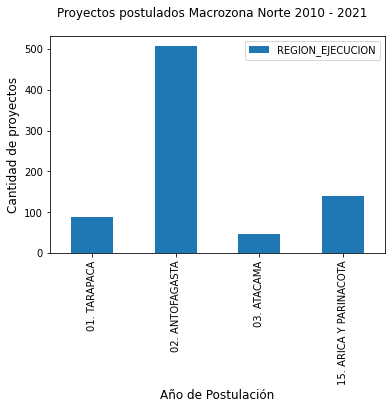

In [93]:
dfResult = dfNorte[['REGION_EJECUCION']].groupby([dfNorte.REGION_EJECUCION], dropna=False).count()

print("######################################")
print ("Adjudicados : " + str(dfNorte['MACROZONA'].count()))
print("######################################")
print(dfNorte['PROGRAMA_CONICYT'].unique())
print("######################################")
print(dfResult)
print("######################################")
dfResult.plot.bar()


plt.suptitle('Proyectos postulados Macrozona Norte ' +  str(AÑO) + ' - 2020') #+ str(datetime.datetime.now().year))
plt.ylabel('Cantidad de proyectos',fontsize=12)
plt.xlabel('Año de Postulación',fontsize=12)
plt.legend()

plt.show()
